# <font color='blue'>A Brief Review of Quantum Mechanics

<font color='black' size=4>**The Schrodinger's equation in one dimension is given by:
\begin{align}
\left [-\frac{\hbar^2}{2m} \frac{\partial^2}{\partial x^2} + V(x) \right] \Psi(x, t) = i\hbar \frac{\partial}{\partial t} \Psi(x, t) \quad (\textrm{Time-depdendent Schrodinger's equation})
\end{align}
If the potential does not depend on time, this equation can be solved by **separation of variables** (i.e., $\Psi(x, t)=\psi(x)\phi(t)$) to obtain:
\begin{align}
\left [-\frac{\hbar^2}{2m} \frac{d^2}{d x^2} + V(x) \right] \psi &= E \psi \quad (\textrm{Time-indepdendent Schrodinger's equation}) \\
\hat{H} \psi &= E \psi
\end{align}
and 
\begin{align}
\phi(t) = e^{-iEt/\hbar}.
\end{align}
$\hat{H}$ is the ***Hamiltonian*** or total energy ***operator***.**

<font color='black' size=4>**In general, we are interested in solving the Schrodinger's equation and finding the energy $E$ and the wavefunction of the system.
Here, we will introduce some concepts of quantum mechanics and introduce some useful approximation techniques using the particle in a box model. After that, we will study the hydrogen atom and molecular systems.**

## <font color='green'>The Particle in a 1D Box Model
<font color='black' size=4>**For a particle in a one-dimensional box of length $a$, the potential is given by:
\begin{align}
V(x)&= 0, \quad \textrm{if } 0 \ge x \ge a \\
V(x)&= \infty, \quad 0 \quad \textrm{otherwise} \\
\end{align}**

<font color='black' size=4>**Outside the box, $\psi(x)=0$. Inside the box, we can find the solution by solving the equation
\begin{align}
\left [-\frac{\hbar^2}{2m} \frac{d^2}{dx^2} \right] \psi = E \psi
\end{align}**

<font color='black' size=4>**and using the boundary conditions $\psi(0)=0$ and $\psi(a)=0$.**

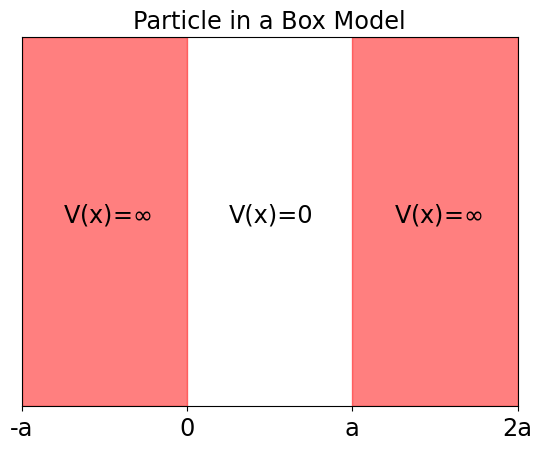

In [14]:
#%matplotlib notebook
import matplotlib.pyplot as plt
# First plot the potential
fig, ax = plt.subplots()
ax.set_xlim((-1, 2))
ax.set_ylim((0, 1))
ax.axvspan(-1, 0, alpha=0.5, color='red')
ax.axvspan(1, 2, alpha=0.5, color='red')

ax.set_xticks(range(-1, 3))
ax.set_xticklabels(["-a", "0", "a", "2a"], fontsize="xx-large")
ax.set_yticks([])

# Put potential labels in the plot
ax.text(-0.75, 0.5, "V(x)=$\infty$", fontsize="xx-large")
ax.text(1.25, 0.5, "V(x)=$\infty$", fontsize="xx-large")
ax.text(0.25, 0.5, "V(x)=0", fontsize="xx-large")

ax.set_title("Particle in a Box Model", fontsize="xx-large")

plt.show()

In [15]:
import sympy
from IPython.display import display
# Define some symbols
hbar, m, x, a, E = sympy.symbols("hbar, m, x, a, E", positive=True)
n = sympy.symbols("n", positive=True, integer=True)
psi = sympy.symbols("psi", cls=sympy.Function)

In [16]:
# Write and solve the Schrodinger's equation
schrodinger = sympy.Eq(-hbar**2/(2*m) * psi(x).diff(x, 2), E*psi(x))
print("The Schrodinger's equation is given by:")
display(schrodinger)

# Apply the boundary condition at psi(0)=0
initial_conditions = {psi(0): 0}
solution = sympy.dsolve(schrodinger, ics=initial_conditions)
print("Using the boundary condition at x=0, the solution is:")
display(solution)

The Schrodinger's equation is given by:


Eq(-hbar**2*Derivative(psi(x), (x, 2))/(2*m), E*psi(x))

Using the boundary condition at x=0, the solution is:


Eq(psi(x), C1*sin(sqrt(2)*sqrt(E)*sqrt(m)*x/hbar))

In [17]:
# Solve the second boundary condition psi(a)=0
print("Solving the boundary condition at x=a, the energy is found to be:")
equations = sympy.Eq(solution.subs(x, a).rhs, 0)     

energy = sympy.solveset(equations, E, domain=sympy.Reals)
# Extract the expression
energy = energy.args[1].args[1].args[1].args[0].args[1]**2
display(energy)

# Write the expression of the energy and substitute it in the solution
energy = n**2*sympy.pi**2*hbar**2/(2*a**2*m)
updated_solution = solution.subs(E, energy)
print("Substituting the energy expression in the wave function, we get")
display(updated_solution)

Solving the boundary condition at x=a, the energy is found to be:


_n**2*pi**2*hbar**2/(2*a**2*m)

Substituting the energy expression in the wave function, we get


Eq(psi(x), C1*sin(pi*n*x/a))

## <font color='orange'>**Properties of the Hamiltonian Eigenfunctions**
<font color='black' size=4>**The Hamiltonian $\hat{H}$ has the special property of being a ***Hermitian*** operator. Hermitian operators have real ***expectation (average) values*** and therefore all **observables** need to have a Hermitian operator (recall that the expecation value for an operator $\hat{o}$ is given by $\langle o \rangle = \int_{-\infty}^\infty \psi^* \hat{o} \psi dx $ for a ***normalized*** $\psi$). For an operator to be Hermitian, it needs to satisfy this relationship: 
$\int \psi^* \left ( \hat{o} \psi \right ) dx = \int \left (\hat{o}^*\psi^*  \right ) \psi dx$**

<font color='black' size=4>**In general, eigenfunctions of Hermitian operators have the following important properties:**
* <font color='black' size=4>***Normalized***: $\int_{-\infty}^{\infty} \psi_n^* \psi_m dx = 1$ if $n = m$
* <font color='black' size=4>***Orthogonal***: $\int_{-\infty}^{\infty} \psi_n^* \psi_m dx = 0$ if $n \neq m$
* <font color='black' size=4>**We can combine the normalization and orthogonality properties:**
    * <font color='black' size=4>**Orthonormal**: $\int_{-\infty}^{\infty} \psi_n^* \psi_m dx = \delta_{nm}$
    * <font color='black' size=4>**$\delta_{nm}$: ***Kronecker delta***.**
        * <font color='black' size=4>**$\delta_{nm}= 1$ if $n = m$**
        * <font color='black' size=4>**$\delta_{nm}= 0$ if $n \neq m$**
* <font color='black' size=4>**Form a ***complete basis set***:**
    * <font color='black' size=4>***Any*** **function can be written as a linear combination of these eigenfunctions**
    * <font color='black' size=4>**$f(x) = \sum_{n=1}^\infty c_n \psi_n(x)$**
    * <font color='black' size=4>**For a particle in a box, a function $f(x)$ defined between $0$ and $a$ can be written as:**
        * <font color='black' size=4>**$f(x) = \sqrt{\frac{2}{a}} \sum_{n=1}^\infty c_n \textrm{sin}(n \pi x/a)$**
        * <font color='black' size=4>**This is just the Fourier series for $f(x)$.**

 
<font color='black' size=4>**Analogy: The $\hat{i}, \hat{j},$ and $\hat{k}$ unit vectors represent a complete orthonormal basis for vectors in the three dimensional space**
* <font color='black' size=4>**$\hat{i}, \hat{j},$ and $\hat{k}$ are normalized: (e.g., $\hat{i}\cdot \hat{i} = 1$)**
* <font color='black' size=4>**$\hat{i}, \hat{j},$ and $\hat{k}$ are orthogonal: (e.g., $\hat{i}\cdot \hat{j} = 0$)**
* <font color='black' size=4>**Any vector $\overrightarrow{v}$ can be written in terms of the basis vectors $\hat{i}, \hat{j}$ and $\hat{k}$**
    * <font color='black' size=4>**$\overrightarrow{v} = v_x \hat{i} + v_y \hat{j} + v_z \hat{k}$**


In [18]:
print("Again, the wavefunction for the particle in a box is given by:")
display(updated_solution)

# We evaluate C1 by normalization:
print("To find C1, we use the normalization condition.")
rhs = updated_solution.rhs
integral = sympy.Integral(rhs.conjugate()*rhs, (x, 0, a))

normalization_condition = sympy.Eq(integral, 1)
display(normalization_condition)

print("The value of the integral is")
display(integral.doit())

print("Thus, the wavefunction is given by")
wavefunction = sympy.Eq(psi(x, n), sympy.sqrt(2/a)*sympy.sin(n*sympy.pi*x/a))
display(wavefunction)

# Verify orthonormality for the particle in a box
m = sympy.symbols("m", positive=True, integer=True)
psi_n = sympy.sqrt(2/a)*sympy.sin(n*sympy.pi*x/a)
psi_m = psi_n.subs(n, m)
integral = sympy.Integral(psi_n.conjugate()*psi_m, (x, 0, a))
print("To verify the orthonormality for the particle in a box eigenfunctions,")
print("we calculate the following integral:")
display(integral)
print("The result is: ")
display(integral.doit())

Again, the wavefunction for the particle in a box is given by:


Eq(psi(x), C1*sin(pi*n*x/a))

To find C1, we use the normalization condition.


Eq(Integral(C1*sin(pi*n*x/a)**2*conjugate(C1), (x, 0, a)), 1)

The value of the integral is


C1*a*conjugate(C1)/2

Thus, the wavefunction is given by


Eq(psi(x, n), sqrt(2)*sin(pi*n*x/a)/sqrt(a))

To verify the orthonormality for the particle in a box eigenfunctions,
we calculate the following integral:


Integral(2*sin(pi*m*x/a)*sin(pi*n*x/a)/a, (x, 0, a))

The result is: 


Piecewise((0, Ne(m, n)), (1, True))

## <font color='brown'>**The Variational Method**
<font color='black' size=4>**It is often the case that the Schrodinger's equation cannot be solved exactly even for simple quantum mechanical systems. The variational method is a powerful approximation technique that gives an upper bound for the energy. For *any* normalized trial wavefunction $\psi$,
\begin{align}
E_{gs} \le \int_{-\infty}^\infty \psi^*\hat{H}\psi dx \equiv \langle E \rangle.
\end{align}**

<font color='black' size=4>**The expectation value for the energy for the state $\psi$ is certain to overestimate the ground state energy. The equality holds if $\psi$ happened to be the correct state.**

<font color='black' size=4>***Proof***:
<font color='black' size=4>**As mentioned above, the eigenfunctions of the Hamiltonian form a complete basis set. Therefore, we can express $\psi$ as a linear combination of these orthonormalized eigenfunctions:
\begin{align}
\psi = \sum_n c_n \psi_n, \quad \textrm{with } \hat{H}\psi_n = E_n \psi_n
\end{align}**

<font color='black' size=4>**Since $\psi$ is normalized,
\begin{align}
1 = \int_{-\infty}^\infty \psi^*\psi dx = \sum_m \sum_n c_m^* c_n \int_{-\infty}^\infty \psi_m^*\psi_n dx = \sum_n |c_n|^2.
\end{align}**

<font color='black' size=4>**The average energy is:
\begin{align}
\langle E \rangle = \int_{-\infty}^\infty \psi^*\hat{H}\psi dx = \sum_m \sum_n c_m^* c_n \int_{-\infty}^\infty \psi_m^* \hat{H} \psi_n dx= \sum_n E_n |c_n|^2.
\end{align}**

<font color='black' size=4>**Since the ground state energy is the minimum eigenvalue, $E_{gs} \le E_n$ and so
\begin{align}
\langle E \rangle \ge E_{gs} \sum_n |c_n|^2 = E_{gs},
\end{align}**

<font color='black' size=4>**which proves the variational method.**

#### <font color='black'>**How do we use the variational method in practice?**
* <font color='black' size=4>**Propose a normalized trial wavefunction for the system that depends on one or more parameters.**
* <font color='black' size=4>**Calculate the expectation value of the energy from the trial wavefunction.**
* <font color='black' size=4>**Minimize the expectation value of the energy with respect to the given parameters.**

#### <font color='black' size=4>**Example demonstrating the variational principle:**
<font color='black' size=4>**We will use the following trial function to estimate the ground state energy of the particle in a box model: $\psi(x) = \sqrt{\frac{30}{a^5}} x(a-x)$**

In [19]:
# Here we demonstrate the variational principle
import sympy
from IPython.display import display
# Define some symbols
hbar, m, x, a, E = sympy.symbols("hbar, m, x, a, E", positive=True)
psi = sympy.sqrt(30/a**5)*x*(a-x)

print("Let's verify that the trial wavefunction is normalized:")
integral = sympy.Integral(psi.conjugate()*psi, (x, 0, a))
print("The integral")
display(integral)
print("is equal to")
display(integral.doit())

print("Now, let's calculate the expectation value for the energy:")
average_energy = -hbar**2/(2*m)*sympy.Integral(psi.conjugate()*psi.diff(x, 2), (x, 0, a))
display(average_energy)
print("equals")
display(average_energy.doit())

print("This energy is greater than the true energy given by:")
true_energy = hbar**2*sympy.pi**2/(2*m*a**2)
display(true_energy)

print("This demonstrates the variational principle.")

Let's verify that the trial wavefunction is normalized:
The integral


Integral(30*x**2*(a - x)**2/a**5, (x, 0, a))

is equal to


1

Now, let's calculate the expectation value for the energy:


-hbar**2*Integral(-60*x*(a - x)/a**5, (x, 0, a))/(2*m)

equals


5*hbar**2/(a**2*m)

This energy is greater than the true energy given by:


pi**2*hbar**2/(2*a**2*m)

This demonstrates the variational principle.


## <font color='pink'>**Quantum Mechanics Notations and Conventions**
<font color='black' size=4>**We will introduce here conventions and notations commonly used in quantum mechanics. Adopting these conventions will simplify the mathematical formula used in quantum chemistry and make them more powerful.**

### <font color='GreenDark'>**Atomic units**
<font color='black' size=4>**The Schrodinger's equation can be simplified greatly by the use of the so-called ***atomic units***. In atomic units, we set $\hbar$, $m_e$, $e$, and $4 \pi \epsilon_0$, to 1. We will see the advantage of using atomic units when we discuss the Hamiltonian for molecular systems.**

### <font color='GreenDark'>**Dirac notation**
<font color='black' size=4>**In the above discussion, we introduced quantum mechanics with the familiar language of functions and wave mechanics. However, mathematical relationships in quantum mechanics are often represented by a more powerful and convenient approach developed by Dirac. In the Dirac notation, a wavefunction $\psi$ is represented by a **ket** $| \psi \rangle$ and its complex conjugate $\psi^*$ is represented by a **bra** $\langle \psi |$.**

<font color='black' size=4>**We illustrate below a few relationships using the Dirac notation:**
* <font color='black' size=4>**The time-independent Schrodinger's equation: $\hat{H} | \psi \rangle = E | \psi \rangle$**
* <font color='black' size=4>**For a Hermitian operator, $\langle \psi |\hat{o} \psi \rangle = \langle \hat{o} \psi | \psi \rangle$**
* <font color='black' size=4>**For orthonormal eigenfunctions, $\langle n | m \rangle = \delta_{nm}$**
* <font color='black' size=4>**The expecation value for an operator is: $\langle \hat{o} \rangle = \langle \psi |\hat{o}| \psi \rangle$**

### <font color='GreenDark'>**Vector and matrix representations**
<font color='black' size=4>**Relationships in quantum mechanics can also be described using the language of linear algebra. Consider a wavefunction $\psi$ that is written as a linear combination of basis functions:
\begin{align}
\psi = \sum_n c_n \psi_n
\end{align}**

<font color='black' size=4>**In the Dirac notation, this wavefunction and its complex conjugate are written as:
\begin{align}
| \psi \rangle &= \sum_n c_n | \psi_n \rangle \\
               &= \sum_n c_n | n \rangle, \\
\langle \psi | &= \sum_n c_n^* \langle \psi_n | \\
               &= \sum_n c_n^* \langle n |
\end{align}**

<font color='black' size=4>**A ket $| \psi \rangle = \sum_n a_n | n \rangle$ written in terms of an orthonormal basis kets $| n \rangle$ is written as a column vector:
\begin{align}
| \psi \rangle = \begin{pmatrix}a_1 \\ a_2 \\ \vdots \\ a_n \end{pmatrix}.
\end{align}**

<font color='black' size=4>**The bra $\langle \psi |$ is written as a row vector with complex conjugate coefficients:
\begin{align}
\langle \psi | = \begin{pmatrix}a_1^* a_2^* \cdots a_n^* \end{pmatrix}.
\end{align}**

<font color='black' size=4>**The inner product of two state vectors is simply the dot product between a column and a row vector:
\begin{align}
\langle \psi_a | \psi_b \rangle = \begin{pmatrix}a_1^* a_2^* \cdots a_n^* \end{pmatrix} \begin{pmatrix}b_1 \\ b_2 \\ \vdots \\ b_n \end{pmatrix} = \sum_{i=1}^n a_i^* b_i.
\end{align}**

<font color='black' size=4>**Finally, an operator is represented by a matrix:
\begin{align}
| \psi_b \rangle &= \hat{o} | \psi_a \rangle \\
\begin{pmatrix} b_1 \\ b_2 \\ \vdots \\ b_n \end{pmatrix} &=
\begin{pmatrix} o_{11} & o_{12} & \cdots & o_{1n} \\
                o_{21} & o_{22} & \cdots & o_{2n} \\
                \vdots & \vdots & \ddots & \vdots \\
                o_{n1} & o_{n2} & \cdots & o_{nn}
\end{pmatrix}
\begin{pmatrix}a_1 \\ a_2 \\ \vdots \\ a_n \end{pmatrix}.
\end{align}
The matrix elements can be written as:
\begin{align}
o_{ij} = \langle i | \hat{o} | j \rangle
\end{align}**

# <font color='#2F4F4F'>**The Hydrogen Atom**

<font color='black' size=4>**The hydrogen atom and hydrogen-like atomic ions (e.g., He$^{1+}$ and Li$^{2+}$) are the only atomic systems for which the Schrodinger's equation can be solved analytically. For other atomic and molecular systems, numerical approximations are necessary. We will briefly review below the solution for the hydrogen atom.**

<font color='black' size=4>**The hydrogen atom consists of a negatively charged electron and a positively charged nucleus separated by a distance $r$. This two-body problem can be reduced to a one-body problem where the origin is set at the center of mass and a single particle with a reduced mass $\mu$ is at distance $r$ from the origin ($\mu = \frac{m_1 m_2}{m_1+m_2}$). The attraction between the electron and the nucleus is described by the Coulomb potential.**

<font color='black' size=4>**The Schrodinger's equation in the SI units is given by:
\begin{align}
-\frac{\hbar^2}{2\mu} \nabla^2 \psi -\frac{1}{4 \pi \epsilon_0} \frac{e^2}{r} \psi &= E \psi
\end{align}**

<font color='black' size=4>**The Laplacian in spherical coordinates is given by:
\begin{align}
\nabla^2 = \frac{1}{r^2} \frac{\partial}{\partial r } \left ( r^2 \frac{\partial}{\partial r} \right ) + 
\frac{1}{r^2 \textrm{sin} \theta} \frac{\partial}{\partial \theta} \left ( \textrm{sin} \theta \frac{\partial}{\partial \theta} \right ) + 
\frac{1}{r^2 \textrm{sin}^2 \theta} \frac{\partial^2}{\partial \phi^2}
\end{align}**

In [20]:
import sympy
psi = sympy.symbols("psi", cls=sympy.Function)
R, Y = sympy.symbols("R, Y", cls=sympy.Function)
r, theta, phi, E, hbar, mu, epsilon_0, e = sympy.symbols("r, theta, phi, E, hbar, mu, epsilon_0, e", real=True)
psi = psi(r, theta, phi)

first_term = 1/r**2*(r**2*psi.diff(r)).diff(r)
second_term = 1/(r**2*sympy.sin(theta))*(sympy.sin(theta)*psi.diff(theta)).diff(theta)
third_term = 1/(r**2 * sympy.sin(theta)**2)*psi.diff(phi, 2)

kinetic = -hbar**2/(2*mu) * (first_term + second_term + third_term)
potential = -1/(4*sympy.pi*epsilon_0)*e**2/r * psi
schrodinger = E * psi - (kinetic + potential)
print("The Schrodinger's equation for the hydrogen atom is given by:")
display(sympy.Eq(schrodinger, 0))

print("Using separation of variables,")
display(sympy.Eq(psi, R(r)*Y(theta, phi)))

print("The equation becomes:")
schrodinger = schrodinger.subs(psi, R(r)*Y(theta, phi))
psi = R(r)*Y(theta, phi)
display(sympy.Eq(schrodinger, 0))

print("We can simplify the equation by multiplying the equation by the following term:")
factor = 2*mu*r**2/(hbar**2*psi)
display(factor)

print("to get")
separable_equation = (schrodinger*factor).simplify()
display(sympy.Eq(separable_equation, 0))

The Schrodinger's equation for the hydrogen atom is given by:


Eq(E*psi(r, theta, phi) + e**2*psi(r, theta, phi)/(4*pi*epsilon_0*r) + hbar**2*((r**2*Derivative(psi(r, theta, phi), (r, 2)) + 2*r*Derivative(psi(r, theta, phi), r))/r**2 + (sin(theta)*Derivative(psi(r, theta, phi), (theta, 2)) + cos(theta)*Derivative(psi(r, theta, phi), theta))/(r**2*sin(theta)) + Derivative(psi(r, theta, phi), (phi, 2))/(r**2*sin(theta)**2))/(2*mu), 0)

Using separation of variables,


Eq(psi(r, theta, phi), R(r)*Y(theta, phi))

The equation becomes:


Eq(E*R(r)*Y(theta, phi) + e**2*R(r)*Y(theta, phi)/(4*pi*epsilon_0*r) + hbar**2*((r**2*Derivative(R(r)*Y(theta, phi), (r, 2)) + 2*r*Derivative(R(r)*Y(theta, phi), r))/r**2 + (sin(theta)*Derivative(R(r)*Y(theta, phi), (theta, 2)) + cos(theta)*Derivative(R(r)*Y(theta, phi), theta))/(r**2*sin(theta)) + Derivative(R(r)*Y(theta, phi), (phi, 2))/(r**2*sin(theta)**2))/(2*mu), 0)

We can simplify the equation by multiplying the equation by the following term:


2*mu*r**2/(hbar**2*R(r)*Y(theta, phi))

to get


Eq(2*E*mu*r**2/hbar**2 + e**2*mu*r/(2*pi*epsilon_0*hbar**2) + r**2*Derivative(R(r), (r, 2))/R(r) + 2*r*Derivative(R(r), r)/R(r) + Derivative(Y(theta, phi), (theta, 2))/Y(theta, phi) + Derivative(Y(theta, phi), theta)/(Y(theta, phi)*tan(theta)) + Derivative(Y(theta, phi), (phi, 2))/(Y(theta, phi)*sin(theta)**2), 0)

As shown in the above equation, all terms now depend on either the radial part or the angular part. For this equation to hold, the radial component and the angular component both should be equal to a constant. Thus, we can separate this equation into two equations: radial and angular. 

In [28]:
radial_part = sympy.collect(separable_equation, [1/Y(theta, phi)], exact=False, evaluate=False)[1]
angular_part = sympy.collect(separable_equation, [r], exact=False, evaluate=False)[1]
print("The radial part:")
display(radial_part)

print("The angular part:")
display(angular_part)

n, l, m = sympy.symbols("n, l, m", integer=True)

print("We set the radial part to a constant chosen to be l(l+1)")
display(sympy.Eq(radial_part, l*(l+1)))

print("and we set the angular part to -l(l+1)")
display(sympy.Eq(angular_part, -l*(l+1)))

The radial part:


2*E*mu*r**2/hbar**2 + e**2*mu*r/(2*pi*epsilon_0*hbar**2) + r**2*Derivative(R(r), (r, 2))/R(r) + 2*r*Derivative(R(r), r)/R(r)

The angular part:


Derivative(Y(theta, phi), (theta, 2))/Y(theta, phi) + Derivative(Y(theta, phi), theta)/(Y(theta, phi)*tan(theta)) + Derivative(Y(theta, phi), (phi, 2))/(Y(theta, phi)*sin(theta)**2)

We set the radial part to a constant chosen to be l(l+1)


Eq(2*E*mu*r**2/hbar**2 + e**2*mu*r/(2*pi*epsilon_0*hbar**2) + r**2*Derivative(R(r), (r, 2))/R(r) + 2*r*Derivative(R(r), r)/R(r), l*(l + 1))

and we set the angular part to -l(l+1)


Eq(Derivative(Y(theta, phi), (theta, 2))/Y(theta, phi) + Derivative(Y(theta, phi), theta)/(Y(theta, phi)*tan(theta)) + Derivative(Y(theta, phi), (phi, 2))/(Y(theta, phi)*sin(theta)**2), -l*(l + 1))

<font color='black' size=4>**The solution to the radial and angular equations are complicated. Solving the equations, we get the following energy levels for the hydrogen atom:
\begin{align}
E_n = -\left [ \frac{m_e}{2 \hbar^2} \left ( \frac{e^2}{4 \pi \epsilon_0} \right )^2 \right ] \frac{1}{n^2} = \frac{E_1}{n^2}, \quad n=1, 2, 3, \cdots.
\end{align}**

<font color='black' size=4>**In atomic units, the energy is given by:
\begin{align}
E_n = \frac{1}{2 n^2}, \quad n=1, 2, 3, \cdots.
\end{align}**

<font color='black' size=4>**The energy unit in atomic units is the Hartree (1 Hartree $\approx$ 27.21 eV $\approx$ 627.5 kcal/mol), so the energy of hydrogen in the ground state is 1/2 Hartree.**

<font color='black' size=4>**The energy of hydrogen is quantized and it depends on the integer $n$. $n$ is called the ***principal quantum number***. The wavefunction also depends on the $l$ and $m$ quantum numbers which are called, respectively, the ***azimuthal*** and the ***magnetic*** quantum numbers. Notice that the energy of the hydrogen atom only depends on $n$. The allowed values for the three quantum numbers are discussed in introductory chemistry text books and are given by:
\begin{align}
n &= 1, 2, 3, \cdots \\
l &= 0, 1, \cdots, n-1 \\
m &= -l, -l+1, \cdots, l-1, l  
\end{align}**

<font color='black' size=4>**Again, the wavefunction for the hydrogen atom is separable: $\psi(r, \theta) = R(r) Y(\theta, \phi)$. The shape of the wavefunction (***orbital***) depends on the three quantum numbers $n$, $l$, and $m$:
\begin{align}
\psi_{nlm}(r, \theta, \phi) = R_{nl}(r) Y_l^m(\theta, \phi),
\end{align}
where $Y_l^m(\theta, \phi)$ are called the ***spherical harmonics***. As known from introductory chemistry, values of $l=0$, $l=1$, $l=2$, and $l=3$ correspond to the ***s***, ***p***, ***d***, and ***f**<font color='black' size=4>*** orbitals, respectively.**

<font color='black' size=4>**We list below the first few radial and angular terms in atomic units:**

In [26]:
import sympy.physics.hydrogen
psi, Y, R = sympy.symbols("psi, Y, R", cls=sympy.Function)
Y_lm = sympy.functions.special.spherical_harmonics.Ynm

print("Radial Terms:")
for n_value in range(1, 4):
    for l_value in range(0, n_value):
        display(sympy.Eq(R(n_value, l_value),
                         sympy.physics.hydrogen.R_nl(n_value, l_value, r)))

print("\n\nAngular Terms:")
for l_value in range(3):
    for m_value in range(-l_value, l_value+1):
        display(sympy.Eq(Y(l_value, m_value),
                         Y_lm(l_value, m_value, theta, phi)).expand(func=True))

Radial Terms:


Eq(R(1, 0), 2*exp(-r))

Eq(R(2, 0), sqrt(2)*(2 - r)*exp(-r/2)/4)

Eq(R(2, 1), sqrt(6)*r*exp(-r/2)/12)

Eq(R(3, 0), 2*sqrt(3)*(2*r**2/9 - 2*r + 3)*exp(-r/3)/27)

Eq(R(3, 1), sqrt(6)*r*(4 - 2*r/3)*exp(-r/3)/81)

Eq(R(3, 2), 2*sqrt(30)*r**2*exp(-r/3)/1215)



Angular Terms:


Eq(Y(0, 0), 1/(2*sqrt(pi)))

Eq(Y(1, -1), sqrt(6)*exp(-I*phi)*sin(theta)/(4*sqrt(pi)))

Eq(Y(1, 0), sqrt(3)*cos(theta)/(2*sqrt(pi)))

Eq(Y(1, 1), -sqrt(6)*exp(I*phi)*sin(theta)/(4*sqrt(pi)))

Eq(Y(2, -2), -sqrt(30)*exp(-2*I*phi)*cos(theta)**2/(8*sqrt(pi)) + sqrt(30)*exp(-2*I*phi)/(8*sqrt(pi)))

Eq(Y(2, -1), sqrt(30)*exp(-I*phi)*sin(theta)*cos(theta)/(4*sqrt(pi)))

Eq(Y(2, 0), 3*sqrt(5)*cos(theta)**2/(4*sqrt(pi)) - sqrt(5)/(4*sqrt(pi)))

Eq(Y(2, 1), -sqrt(30)*exp(I*phi)*sin(theta)*cos(theta)/(4*sqrt(pi)))

Eq(Y(2, 2), -sqrt(30)*exp(2*I*phi)*cos(theta)**2/(8*sqrt(pi)) + sqrt(30)*exp(2*I*phi)/(8*sqrt(pi)))

<font color='black' size=4>**We can make several observations about the radial and angular solutions. All radial solutions are proportional to an exponential term $e^{-r}$ that decays rapidly for large $r$. We can also see that the radial solution depends on a polynomial of $r$ with the order $n-1$. The angular solutions depend on $\theta$ and $\phi$ but the $\phi$ dependence disappears for $m=0$. Also, the spherical harmonics are complex functions. Remember that the wavefunction in general is complex but the expectation values for experimental observables are real. Again, the total wavefunction is a product of the radial and angular components.**

<font color='black' size=4>**Below we try the solutions and verify that they satisfy the above equations. We will first convert the radial equation from the SI units to the atomic units.**

In [29]:
print("We first verify the radial solutions.")
print("Radial equation in atomic units:")
radial_part = radial_part.subs({mu: 1, hbar:1, e: 1, epsilon_0: 1/(4*sympy.pi)})
radial_equation = radial_part - l*(l+1)
display(sympy.Eq(radial_equation, 0))

print("Substitute the radial solution and the energy:")
for n_value in range(1, 4):
    for l_value in range(0, n_value):
        print("n = %i, l = %i" %(n_value, l_value))
        equation = radial_equation.subs({R(r): sympy.physics.hydrogen.R_nl(n_value, l_value, r),
                                         E: sympy.physics.hydrogen.E_nl(n_value),
                                         l: l_value})
        display(equation)
        display(equation.doit().simplify())

We first verify the radial solutions.
Radial equation in atomic units:


Eq(2*E*r**2 - l*(l + 1) + r**2*Derivative(R(r), (r, 2))/R(r) + 2*r + 2*r*Derivative(R(r), r)/R(r), 0)

Substitute the radial solution and the energy:
n = 1, l = 0


r**2*exp(r)*Derivative(2*exp(-r), (r, 2))/2 - r**2 + r*exp(r)*Derivative(2*exp(-r), r) + 2*r

0

n = 2, l = 0


-r**2/4 + 2*sqrt(2)*r**2*exp(r/2)*Derivative(sqrt(2)*(2 - r)*exp(-r/2)/4, (r, 2))/(2 - r) + 2*r + 4*sqrt(2)*r*exp(r/2)*Derivative(sqrt(2)*(2 - r)*exp(-r/2)/4, r)/(2 - r)

0

n = 2, l = 1


-r**2/4 + 2*sqrt(6)*r*exp(r/2)*Derivative(sqrt(6)*r*exp(-r/2)/12, (r, 2)) + 2*r + 4*sqrt(6)*exp(r/2)*Derivative(sqrt(6)*r*exp(-r/2)/12, r) - 2

0

n = 3, l = 0


-r**2/9 + 9*sqrt(3)*r**2*exp(r/3)*Derivative(2*sqrt(3)*(2*r**2/9 - 2*r + 3)*exp(-r/3)/27, (r, 2))/(2*(2*r**2/9 - 2*r + 3)) + 2*r + 9*sqrt(3)*r*exp(r/3)*Derivative(2*sqrt(3)*(2*r**2/9 - 2*r + 3)*exp(-r/3)/27, r)/(2*r**2/9 - 2*r + 3)

0

n = 3, l = 1


-r**2/9 + 2*r + 27*sqrt(6)*r*exp(r/3)*Derivative(sqrt(6)*r*(4 - 2*r/3)*exp(-r/3)/81, (r, 2))/(2*(4 - 2*r/3)) - 2 + 27*sqrt(6)*exp(r/3)*Derivative(sqrt(6)*r*(4 - 2*r/3)*exp(-r/3)/81, r)/(4 - 2*r/3)

0

n = 3, l = 2


-r**2/9 + 2*r + 81*sqrt(30)*exp(r/3)*Derivative(2*sqrt(30)*r**2*exp(-r/3)/1215, (r, 2))/4 - 6 + 81*sqrt(30)*exp(r/3)*Derivative(2*sqrt(30)*r**2*exp(-r/3)/1215, r)/(2*r)

0

In [30]:
print("Now we verify the angular solutions.")
angular_equation = angular_part + l*(l+1)
display(sympy.Eq(angular_equation, 0))

print("Substitute the angular solution:")
for l_value in range(3):
    for m_value in range(-l_value, l_value+1):
        print("l = %i, m = %i" %(l_value, m_value))
        equation = angular_equation.subs({Y(theta, phi): Y_lm(l_value, m_value, theta, phi),
                                          l: l_value})
        display(equation.expand(func=True))
        display(equation.doit().expand(func=True).simplify())

Now we verify the angular solutions.


Eq(l*(l + 1) + Derivative(Y(theta, phi), (theta, 2))/Y(theta, phi) + Derivative(Y(theta, phi), theta)/(Y(theta, phi)*tan(theta)) + Derivative(Y(theta, phi), (phi, 2))/(Y(theta, phi)*sin(theta)**2), 0)

Substitute the angular solution:
l = 0, m = 0


2*sqrt(pi)*Derivative(1/(2*sqrt(pi)), (theta, 2)) + 2*sqrt(pi)*Derivative(1/(2*sqrt(pi)), theta)/tan(theta) + 2*sqrt(pi)*Derivative(1/(2*sqrt(pi)), (phi, 2))/sin(theta)**2

0

l = 1, m = -1


2*sqrt(6)*sqrt(pi)*exp(I*phi)*Derivative(sqrt(6)*exp(-I*phi)*sin(theta)/(4*sqrt(pi)), (theta, 2))/(3*sin(theta)) + 2*sqrt(6)*sqrt(pi)*exp(I*phi)*Derivative(sqrt(6)*exp(-I*phi)*sin(theta)/(4*sqrt(pi)), theta)/(3*sin(theta)*tan(theta)) + 2*sqrt(6)*sqrt(pi)*exp(I*phi)*Derivative(sqrt(6)*exp(-I*phi)*sin(theta)/(4*sqrt(pi)), (phi, 2))/(3*sin(theta)**3) + 2

0

l = 1, m = 0


2 + 2*sqrt(3)*sqrt(pi)*Derivative(sqrt(3)*cos(theta)/(2*sqrt(pi)), (theta, 2))/(3*cos(theta)) + 2*sqrt(3)*sqrt(pi)*Derivative(sqrt(3)*cos(theta)/(2*sqrt(pi)), theta)/(3*cos(theta)*tan(theta)) + 2*sqrt(3)*sqrt(pi)*Derivative(sqrt(3)*cos(theta)/(2*sqrt(pi)), (phi, 2))/(3*sin(theta)**2*cos(theta))

0

l = 1, m = 1


2 - 2*sqrt(6)*sqrt(pi)*exp(-I*phi)*Derivative(-sqrt(6)*exp(I*phi)*sin(theta)/(4*sqrt(pi)), (theta, 2))/(3*sin(theta)) - 2*sqrt(6)*sqrt(pi)*exp(-I*phi)*Derivative(-sqrt(6)*exp(I*phi)*sin(theta)/(4*sqrt(pi)), theta)/(3*sin(theta)*tan(theta)) - 2*sqrt(6)*sqrt(pi)*exp(-I*phi)*Derivative(-sqrt(6)*exp(I*phi)*sin(theta)/(4*sqrt(pi)), (phi, 2))/(3*sin(theta)**3)

0

l = 2, m = -2


6 + 4*sqrt(30)*sqrt(pi)*exp(2*I*phi)*Derivative(-sqrt(30)*exp(-2*I*phi)*cos(theta)**2/(8*sqrt(pi)) + sqrt(30)*exp(-2*I*phi)/(8*sqrt(pi)), theta)/(-15*cos(theta)**2*tan(theta) + 15*tan(theta)) + 4*sqrt(30)*sqrt(pi)*exp(2*I*phi)*Derivative(-sqrt(30)*exp(-2*I*phi)*cos(theta)**2/(8*sqrt(pi)) + sqrt(30)*exp(-2*I*phi)/(8*sqrt(pi)), (phi, 2))/(-15*sin(theta)**2*cos(theta)**2 + 15*sin(theta)**2) + 4*sqrt(30)*sqrt(pi)*exp(2*I*phi)*Derivative(-sqrt(30)*exp(-2*I*phi)*cos(theta)**2/(8*sqrt(pi)) + sqrt(30)*exp(-2*I*phi)/(8*sqrt(pi)), (theta, 2))/(15 - 15*cos(theta)**2)

0

l = 2, m = -1


2*sqrt(30)*sqrt(pi)*exp(I*phi)*Derivative(sqrt(30)*exp(-I*phi)*sin(theta)*cos(theta)/(4*sqrt(pi)), (theta, 2))/(15*sin(theta)*cos(theta)) + 2*sqrt(30)*sqrt(pi)*exp(I*phi)*Derivative(sqrt(30)*exp(-I*phi)*sin(theta)*cos(theta)/(4*sqrt(pi)), theta)/(15*sin(theta)*cos(theta)*tan(theta)) + 2*sqrt(30)*sqrt(pi)*exp(I*phi)*Derivative(sqrt(30)*exp(-I*phi)*sin(theta)*cos(theta)/(4*sqrt(pi)), (phi, 2))/(15*sin(theta)**3*cos(theta)) + 6

0

l = 2, m = 0


6 + 2*sqrt(5)*sqrt(pi)*Derivative(3*sqrt(5)*cos(theta)**2/(4*sqrt(pi)) - sqrt(5)/(4*sqrt(pi)), (theta, 2))/(15*cos(theta)**2/2 - 5/2) + 2*sqrt(5)*sqrt(pi)*Derivative(3*sqrt(5)*cos(theta)**2/(4*sqrt(pi)) - sqrt(5)/(4*sqrt(pi)), theta)/(15*cos(theta)**2*tan(theta)/2 - 5*tan(theta)/2) + 2*sqrt(5)*sqrt(pi)*Derivative(3*sqrt(5)*cos(theta)**2/(4*sqrt(pi)) - sqrt(5)/(4*sqrt(pi)), (phi, 2))/(15*sin(theta)**2*cos(theta)**2/2 - 5*sin(theta)**2/2)

0

l = 2, m = 1


6 - 2*sqrt(30)*sqrt(pi)*exp(-I*phi)*Derivative(-sqrt(30)*exp(I*phi)*sin(theta)*cos(theta)/(4*sqrt(pi)), (theta, 2))/(15*sin(theta)*cos(theta)) - 2*sqrt(30)*sqrt(pi)*exp(-I*phi)*Derivative(-sqrt(30)*exp(I*phi)*sin(theta)*cos(theta)/(4*sqrt(pi)), theta)/(15*sin(theta)*cos(theta)*tan(theta)) - 2*sqrt(30)*sqrt(pi)*exp(-I*phi)*Derivative(-sqrt(30)*exp(I*phi)*sin(theta)*cos(theta)/(4*sqrt(pi)), (phi, 2))/(15*sin(theta)**3*cos(theta))

0

l = 2, m = 2


6 + 4*sqrt(30)*sqrt(pi)*Derivative(-sqrt(30)*exp(2*I*phi)*cos(theta)**2/(8*sqrt(pi)) + sqrt(30)*exp(2*I*phi)/(8*sqrt(pi)), theta)/(-15*exp(2*I*phi)*cos(theta)**2*tan(theta) + 15*exp(2*I*phi)*tan(theta)) + 4*sqrt(30)*sqrt(pi)*Derivative(-sqrt(30)*exp(2*I*phi)*cos(theta)**2/(8*sqrt(pi)) + sqrt(30)*exp(2*I*phi)/(8*sqrt(pi)), (phi, 2))/(-15*exp(2*I*phi)*sin(theta)**2*cos(theta)**2 + 15*exp(2*I*phi)*sin(theta)**2) + 4*sqrt(30)*sqrt(pi)*Derivative(-sqrt(30)*exp(2*I*phi)*cos(theta)**2/(8*sqrt(pi)) + sqrt(30)*exp(2*I*phi)/(8*sqrt(pi)), (theta, 2))/(-15*exp(2*I*phi)*cos(theta)**2 + 15*exp(2*I*phi))

0

<font color='black' size=4>**As mentioned above, different $l$ values correspond to different types of orbitals. Values of $l=0$, $l=1$, $l=2$, and $l=3$ correspond to the **s**, **p**, **d**, and **f** orbitals. Because the spherical harmonics are complex functions, linear combinations of different spherical harmonics are constructed to make real functions. Below we visualize a few of the real angular solutions.**

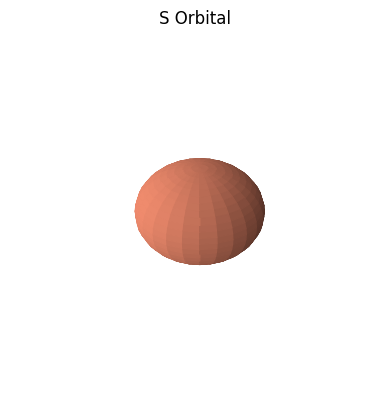

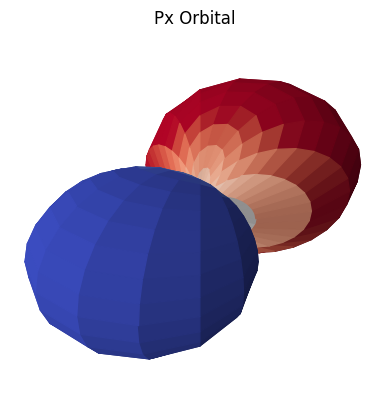

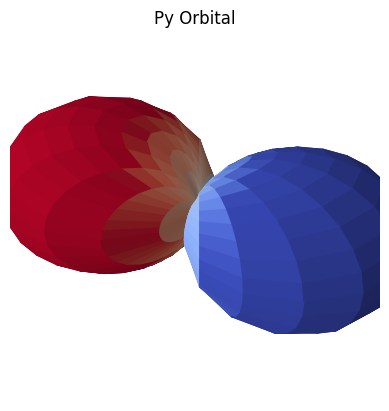

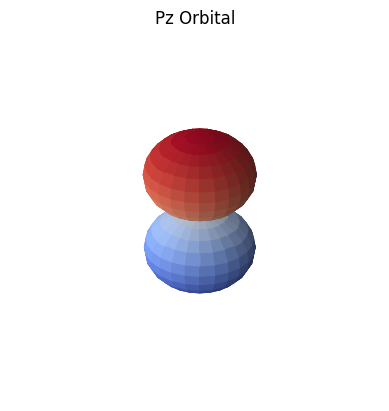

In [31]:
# See this: https://scipython.com/blog/visualizing-the-real-forms-of-the-spherical-harmonics/
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# create grid of theta and phi angles
theta_val = np.linspace(0, np.pi, 25)
phi_val = np.linspace(0, 2*np.pi, 25)
theta_val, phi_val = np.meshgrid(theta_val, phi_val)

# calculate Cartesian values
def spherical_to_cartesian(theta, phi):
    x = np.cos(phi)*np.sin(theta)
    y = np.sin(phi)*np.sin(theta)
    z = np.cos(theta)
    
    return x, y, z

x, y, z = spherical_to_cartesian(theta_val, phi_val)

def calculate_spherical_harmonics(l, m, theta, phi):
    Y = np.zeros_like(theta, dtype=complex)
    for i in range(theta.shape[0]):
        for j in range(theta.shape[1]):
            Y[i][j] = Y_lm(l, m, theta[i][j], phi[i][j]).evalf()

    return Y

def plot_spherical_harmonics(Y, x, y, z, title="Plot"):
    Yx, Yy, Yz = abs(Y)*x, abs(Y)*y, abs(Y)*z
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlim(-0.5, 0.5)
    ax.set_ylim(-0.5, 0.5)
    ax.set_zlim(-0.5, 0.5)
    
    cmap = plt.cm.ScalarMappable(cmap=plt.get_cmap('coolwarm'))
    cmap.set_clim(-0.5, 0.5)
    ax.plot_surface(Yx, Yy, Yz, facecolors=cmap.to_rgba(Y.real))
    ax.axis('off')
    plt.title(title)
    plt.show()

# plot the s orbital
Y = calculate_spherical_harmonics(0, 0, theta_val, phi_val)
plot_spherical_harmonics(Y, x, y, z, "S Orbital")

# plot the p_x orbital
Y = calculate_spherical_harmonics(1, 1, theta_val, phi_val)
Y += calculate_spherical_harmonics(1, -1, theta_val, phi_val)
Y /= 1/np.sqrt(2)/complex(0, 1)
plot_spherical_harmonics(Y, x, y, z, "Px Orbital")

# plot the p_y orbital
Y = calculate_spherical_harmonics(1, 1, theta_val, phi_val)
Y -= calculate_spherical_harmonics(1, -1, theta_val, phi_val)
Y /= 1/np.sqrt(2)
plot_spherical_harmonics(Y, x, y, z, "Py Orbital")

# plot the p_z orbital
Y = calculate_spherical_harmonics(1, 0, theta_val, phi_val)
plot_spherical_harmonics(Y, x, y, z, "Pz Orbital")

### <font color='#68228B'>**What is next?**
<font color='black' size=4>**The hydrogen atom is the only atom for which the Schrodinger's equation can be solved exactly. We will introduce approximate methods that can be used for other atoms and molecules. The variational method and perturbation theory, introduced above, are particularly important approximation techniques. Furthermore, the concept of atomic orbitals, which is based on the solution of the Schrodinger's equation for the hydrogen atom, will be particularly useful for approximating the wavefunction for more complex systems.**

## <font color='#68228B'>**Useful Resources**

- Griffiths, D. J. *Introduction to Quantum Mechanics: International Edition*, 2nd ed.; Pearson: Upper Saddle River, NJ, 2003.
- Atkins, P. and Friedman R. *Molecular Quantum Mechanics*, fourth edition; Oxford University Press, Oxford New York, 2005**